In [1]:
import glob
import json
import sys

sys.path.append('../.venv/lib/python3.7/site-packages')

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [3]:
metricProps = {
    'messageID': '',
    'originatorHostID': '',
    'totalNanoTime': '',
    'lastDeliveryHop': '',
    'relativeMessageRedundancy': ''
}

class Metric(object):
    def __init__(self, props = metricProps):        
        self.messageID = props['messageID']
        self.originatorHostID = props['originatorHostID']
        self.totalNanoTime = int(props['totalNanoTime'])
        self.lastDeliveryHop = float(props['lastDeliveryHop'])
        self.relativeMessageRedundancy = float(props['relativeMessageRedundancy'])

In [8]:
def computeMetrics(algorithm = 'gossip'):
    metrics = []
    nanoTimes = []
    ldh = []
    rmr = []

    pubsubAnalysisFiles = glob.glob('../data/{}/analyses/*.json'.format(algorithm))

    for pubsubAnalysisFile in pubsubAnalysisFiles:
        tmpMetrics = []

        with open(pubsubAnalysisFile) as json_file:
            data = json.load(json_file)
            for metric in data:
                m = Metric(metric)
                tmpMetrics.append(m)
                
                nanoTimes.append(m.totalNanoTime)
                ldh.append(m.lastDeliveryHop)
                rmr.append(m.relativeMessageRedundancy)

        metrics.append(tmpMetrics)
            
    _ = plt.hist(nanoTimes, bins='auto', histtype='step')
    plt.title("{} - Total Nano Time Histogram".format(algorithm))
    plt.xlabel('Total Nano Time')
    plt.ylabel('Occurrence')

    plt.show()
    
    _ = plt.hist(ldh, bins='auto', histtype='step')
    plt.title("{} - Last Delivery Hop Histogram".format(algorithm))
    plt.xlabel('Last Delivery Hop')
    plt.ylabel('Occurrence')

    plt.show()
    
    _ = plt.hist(rmr, bins='auto', histtype='step')
    plt.title("{} - Relative Message Redundancy Histogram".format(algorithm))
    plt.xlabel('Relative Message Redundancy')
    plt.ylabel('Occurrence')

    plt.show()
    
    nanoMean = np.mean(nanoTimes)
    nanoMedian = np.median(nanoTimes)
    nanoStd = np.std(nanoTimes)

    ldhMean = np.mean(ldh)
    ldhMedian = np.median(ldh)
    ldhStd = np.std(ldh)

    rmrMean = np.mean(rmr)
    rmrMedian = np.median(rmr)
    rmrStd = np.std(rmr)

    print('Messages published: {}'.format(len(nanoTimes)))
    print('Total Nano Times - mean: {}, median: {}, std: {}'.format(nanoMean, nanoMedian, nanoStd))
    print('Last Delivery Hop - mean: {}, median: {}, std: {}'.format(ldhMean, ldhMedian, ldhStd))
    print('Relative Message Redundancy - mean: {}, median: {}, std: {}'.format(rmrMean, rmrMedian, rmrStd))

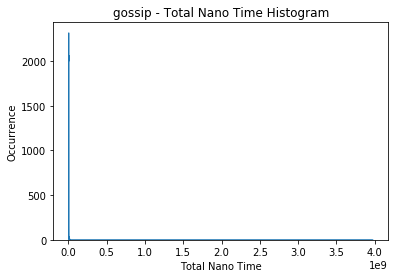

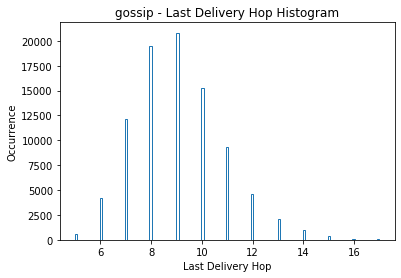

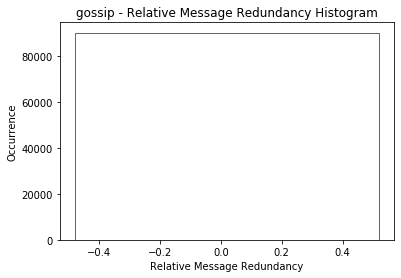

Messages published: 90000
Total Nano Times - mean: 26263571.375944443, median: 5174269.0, std: 224268172.2281729
Last Delivery Hop - mean: 9.067222222222222, median: 9.0, std: 1.788448444743704
Relative Message Redundancy - mean: 0.020408154000000008, median: 0.020408154, std: 6.938893903907228e-18


In [9]:
computeMetrics('gossip')

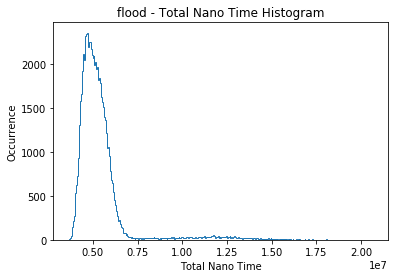

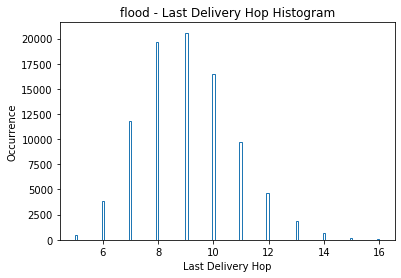

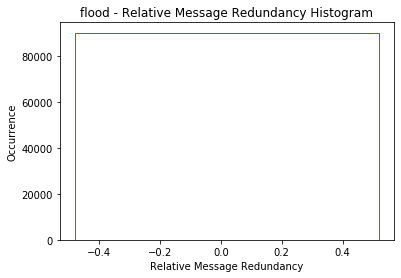

Messages published: 90000
Total Nano Times - mean: 5401697.526744445, median: 5063028.5, std: 1606625.824702993
Last Delivery Hop - mean: 9.058477777777778, median: 9.0, std: 1.7084015643465469
Relative Message Redundancy - mean: 0.020408154000000008, median: 0.020408154, std: 6.938893903907228e-18


In [10]:
computeMetrics('flood')

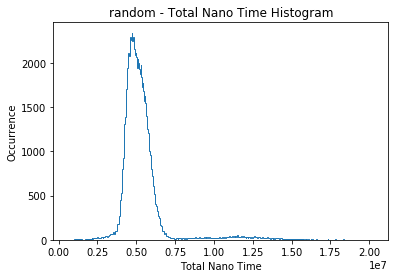

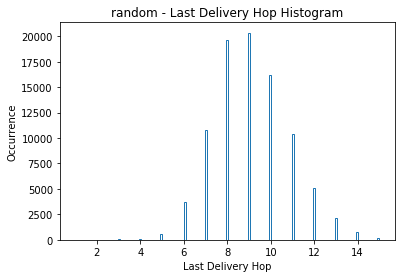

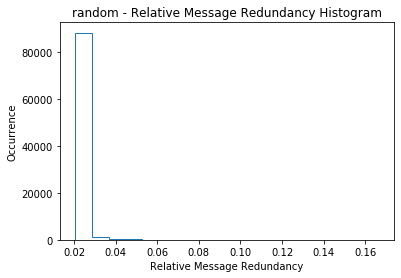

Messages published: 90000
Total Nano Times - mean: 5345632.971422222, median: 5041622.5, std: 1618816.94873532
Last Delivery Hop - mean: 9.105344444444444, median: 9.0, std: 1.745120910558674
Relative Message Redundancy - mean: 0.021059074959888895, median: 0.020408154, std: 0.0044073976014634845


In [11]:
computeMetrics('random')